In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, RidgeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from torch import Tensor
import torch
import torch.nn as nn
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !unzip '/content/drive/MyDrive/competition_1st/data.zip'

# EDA

## 변수 설명
  - **int_rate** : 대출자에 부여된 이자율 (Interest rate of the loan the applicant received)
  - **annual_inc** : 연 소득 (annual income)
  - **dti** : 소득 대비 부채 비율 (Debt-to-income ratio)
  - **delinq_2yrs** : 지난 2년 간 체납 발생 횟수 (Delinquencies on lines of credit in the last 2 years)
  - **inq_last_6mths** : 지난 6개월 간 신용 조회 수 (Inquiries into the applicant's credit during the last 6 months)
  - **pub_rec** : 파산 횟수 (Number of bankruptcies listed in the public record)
  - **revol_bal** : 리볼빙 잔액 (Total credit revolving balance)
  - **total_acc** : 지금까지 소유했던 신용카드 개수 (num_total_cc_accounts : Total number of credit card accounts in the applicant's history)
  - **collections_12_mths_ex_med** : 의료부문을 제외한 지난 12개월 간 추심 발생 횟수 (num_collections_last_12m : Number of collections in the last 12 months. This excludes medical collections)
  - **acc_now_delinq** : 대출자가 체납 상태에 있지 않은 계좌의 수 (The number of accounts on which the borrower is now delinquent)
  - **tot_coll_amt** : 대출자에 대한 현재까지의 총 추심액 (total_collection_amount_ever : The total amount that the applicant has had against them in collections)
  - **tot_cur_bal** : 전 계좌의 현재 통합 잔고 (Total current balance of all accounts)
  - **chargeoff_within_12_mths** : 대출 부 신청인의 대출 신청 직전 12개월 간 세금 공제 횟수 (Number of charge-offs within last 12 months at time of application for the secondary applicant)
  - **delinq_amnt** : 체납 금액 (delinquency amount)
  - **tax_liens** : 세금 저당권의 수 (Number of tax liens)
  - **emp_length1 ~ 12** : 고용 연수 (Number of years in the job)
  - **home_ownership1 ~ 6** : 대출 신청자의 주거 소유 형태 (The ownership status of the applicant's residence)
  - **verification_status1 ~ 3** : 공동 소득 발생 여부 및 형태 (verification_income_joint : Type of verification of the joint income)
  - **purpose1 ~ 14** : 대출 목적 (The purpose of the loan)
  - **initial_list_status1 ~ 2** : 최초 대출 상태 (Initial listing status of the loan)
  - **mths_since_last_delinq1 ~ 11** : 마지막 체납이 지금으로부터 몇개월 전에 있었는지를 나타내는 변수 (Months since the last delinquency)
  
  - **funded_amnt** : 대출액 (Funded amount)
  - **funded_amnt_inv** : 사채 대출액 (Funded amount by investors)
  - **total_rec_late_fee** : 총 연체료 중 납부액 (Late fees received to date)
  - **term1** : 상환 기간 (The number of payments on the loan. Values are in months and can be either 36 or 60)
  - **open_acc** : 개설 개좌 수 (The number of open credit lines in the borrower's credit file)
  - **installment** : 대출 발생 시 월 상환액 (The monthly payment owed by the borrower if the loan originates)
  - **revol_util** : 리볼빙 한도 대비 리볼빙 사용 비율 (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit)
  - **out_prncp** : 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded)
  - **out_prncp_inv** : 사채 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded by investors)
  - **total_rec_int** : 이자 상환액 (Interest received to date)
  - **fico_range_low** : FICO(일종의 신용점수) 최저값 (The lower boundary range the borrower’s FICO at loan origination belongs to)
  - **fico_range_high** : FICO(일종의 신용점수) 최고값 (The upper boundary range the borrower’s FICO at loan origination belongs to)
  
  - **depvar** : 고객의 부도 여부 (dependent variable)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/competition_1st/train.csv')

In [ ]:
# df.info()

In [ ]:
# df.describe()

In [ ]:
# 결측치 확인
# pd.DataFrame(df.isnull().sum()).rename(columns={0:'Non-Null Count'}).T

In [ ]:
# 라벨(depvar) 비율 확인
# print('y=1 ratio :', df.depvar.sum()/len(df))

y=1 ratio : 0.32569


In [ ]:
df_unique = df.nunique()
df_uniq = pd.DataFrame({'cols':df_unique.index, 'values':df_unique.values})
df_uniq.head(10)

In [ ]:
print(list(df.nunique()))

[256, 8905, 4148, 20, 7, 22, 36002, 107, 6, 7, 3871, 80613, 7, 333, 21, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1355, 1391, 2752, 2, 62, 25708, 1101, 28, 28, 85095, 38, 38, 2]


### 의사결정나무 특징 중요도 파악

In [ ]:
dcs_tree_clf = DecisionTreeClassifier(random_state=42)
dcs_tree_clf.fit(df.drop(columns=['depvar']), df['depvar'])
# dcs_tree_clf.score(df.drop(columns=['depvar']), df['depvar'])

DecisionTreeClassifier(random_state=42)

In [ ]:
# Feature 중요도 구하기
def rnd_feat_importance(model, df):
    return pd.DataFrame({'cols':df.columns, 'imp':model.feature_importances_}).sort_values('imp', ascending=False)

fi = rnd_feat_importance(dcs_tree_clf, df.drop(columns=['depvar']))
fi

,cols,imp
72,total_rec_int,0.122129
0,int_rate,0.119230
68,installment,0.087397
11,tot_cur_bal,0.061022
2,dti,0.060549
...,...,...
46,purpose11,0.000077
30,home_ownership4,0.000035
27,home_ownership1,0.000000
29,home_ownership3,0.000000


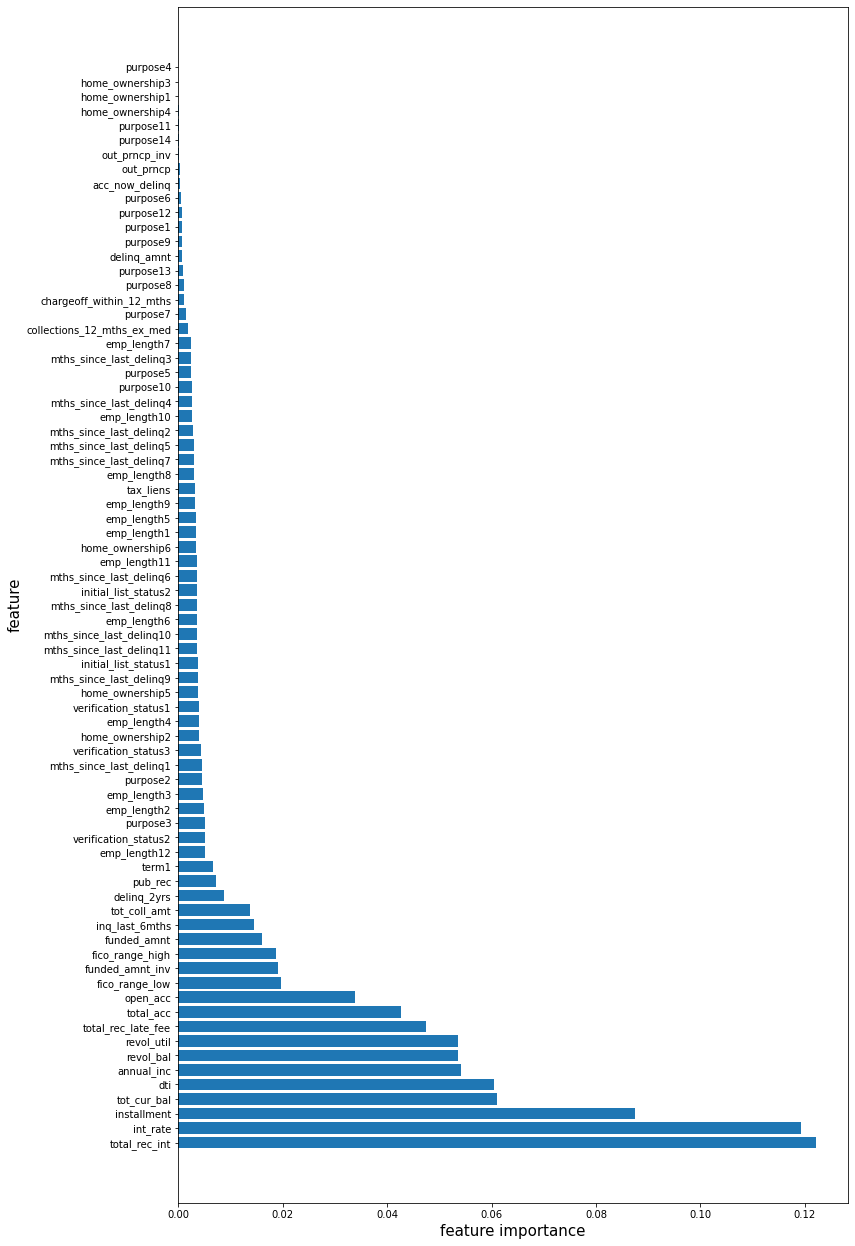

In [ ]:
# Feature importance 시각화
idx = np.arange(len(fi.cols))
plt.figure(figsize=(12, 22))
plt.barh(idx, fi.imp, align='center')
plt.yticks(idx, fi.cols)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

# fi.plot('cols', 'imp', 'barh', figsize=(12,30), legend=False)

In [ ]:
print(1/75) # 0.015 이하는 버릴 예정

In [ ]:
# 상위 Top Feature 추출하기

def ext_top_feat(df, df_feat, num):
    ext_fi = df_feat[:num]
    col_list = ext_fi.cols
    col_list = list(col_list)
    col_list.append('depvar')
    df2 = df[col_list]
    return df2, col_list

df2, col_list = ext_top_feat(df, fi, 16)

In [ ]:
# 중요도 Top 2 Feature
'''
total_rec_int : 이자 상환액 (Interest received to date)
int_rate : 대출자에 부여된 이자율 (Interest rate of the loan the applicant received)
'''

'\ntotal_rec_int : 이자 상환액 (Interest received to date)\nint_rate : 대출자에 부여된 이자율 (Interest rate of the loan the applicant received)\n'

In [ ]:
f_imp_pair = [(x, y) for x, y in enumerate(fi.imp)]
f_imp_pair[:3]

[(0, 0.1221286040105879), (1, 0.11923040539495443), (2, 0.08739740069192296)]

In [ ]:
df2.shape # 10만건의 사람들에 대한 X[16개의 Feature], y[1개 결과값] 정보가 있는 상태

(100000, 17)

### 추출된 features
- **int_rate** : 대출자에 부여된 이자율
- **annual_inc** : 연 소득 (annual income)
- **dti** : 소득 대비 부채 비율
- **inq_last_6mths** : 지난 6개월 간 신용 조회 수 X
- **revol_bal** : 리볼빙 잔액
- **total_acc** : 지금까지 소유했던 신용카드 개수
- **tot_cur_bal** : 전 계좌의 현재 통합 잔고
- **funded_amnt** : 대출액 (Funded amount)
- **funded_amnt_inv** : 사채 대출액
- **total_rec_late_fee** : 총 연체료 중 납부액
- **open_acc** : 개설 개좌 수
- **installment** : 대출 발생 시 월 상환액
- **revol_util** : 리볼빙 한도 대비 리볼빙 사용 비율
- **total_rec_int** : 이자 상환액
- **fico_range_low** : FICO(일종의 신용점수) 최저값 
- **fico_range_high** : FICO(일종의 신용점수) 최고값



In [ ]:
df2.nunique()

total_rec_int         85095
int_rate                256
installment           25708
tot_cur_bal           80613
dti                    4148
annual_inc             8905
revol_bal             36002
revol_util             1101
total_rec_late_fee     2752
total_acc               107
open_acc                 62
fico_range_low           38
funded_amnt_inv        1391
fico_range_high          38
funded_amnt            1355
inq_last_6mths            7
depvar                    2
dtype: int64

In [ ]:
# 유니크한 값 찾기
# "지난 6개월간 신용 조회수" 컬럼의 종류가 10만 개중 7가지 밖에 안되는데 나름 중요도가 있음 0.018정도
print(len(df2['inq_last_6mths'].unique()), df2['inq_last_6mths'].unique())

7 [1 3 2 0 4 5 6]


In [ ]:
df2['inq_last_6mths'].value_counts()

0    56711
1    27487
2    10213
3     3955
4     1127
5      440
6       67
Name: inq_last_6mths, dtype: int64

In [ ]:
df2[df2['inq_last_6mths']==1].shape[0]

27487

In [ ]:
df2[(df2['inq_last_6mths']==6) & (df2['depvar']==1)].shape[0]

24

In [ ]:
for i in range(len(df2['inq_last_6mths'].unique())):
  print( f"{i}값에서 1의비율 {df2[(df2['inq_last_6mths']==i) & (df2['depvar']==1)].shape[0]/ df2[df2['inq_last_6mths']==i].shape[0] * 100}" )

0값에서 1의비율 28.959108462203098
1값에서 1의비율 35.10022919925783
2값에서 1의비율 39.6259669049251
3값에서 1의비율 43.16055625790139
4값에서 1의비율 45.962732919254655
5값에서 1의비율 45.909090909090914
6값에서 1의비율 35.82089552238806


In [ ]:
# 구간 축약하기 // aux(auxiliary) = 보조의
# 결과를 보면 Feature importance가 그렇게 의미있는 것 같지 않음
# 구간 몰려있는 애들 뒤에 다 짤라서, 바로앞구간 max값으로 치환해주고 또 구간나눠서 보는게 의미있을것같은데
auxtotal_rec_int = pd.cut(df['total_rec_int'], 6) #구간마다 1:2 구조임. 특징X
auxint_rate = pd.cut(df['int_rate'], 15)      # 뒤쪽일수록 1비율 큼. 의미O
auxinstallment = pd.cut(df['installment'], 15)  #특징 X
auxtot_cur_bal = pd.cut(df['tot_cur_bal'], 10)  #처음 2구간에 몰려있음 특징 X
auxdti = pd.cut(df['dti'], 10)                # 뒤쪽일수록 1비율 큼. 의미O
auxannual_inc = pd.cut(df['annual_inc'], 10)  # 처음 1구간에 몰려있음
auxrevol_bal = pd.cut(df['revol_bal'], 10)    # 처음 2구간에 몰려있음
auxrevol_util = pd.cut(df['revol_util'], 10)  # 처음 2구간에 몰려있음
auxtotal_rec_late_fee = pd.cut(df['total_rec_late_fee'], 10)  # 처음 1구간에 몰려있음
auxtotal_acc = pd.cut(df['total_acc'], 10)    #특징 X
auxopen_acc = pd.cut(df['open_acc'], 10)      #특징 X
auxfico_range_low = pd.cut(df['fico_range_low'], 10)  #앞쪽일수록 1비율 큼. 의미O
auxfunded_amnt_inv = pd.cut(df['funded_amnt_inv'], 10)  #앞쪽일수록 0이 좀더 큰것같긴한데 미미함
auxfico_range_high = pd.cut(df['fico_range_high'], 10)  #앞쪽일수록 1비율 큼. 의미O
auxfunded_amnt = pd.cut(df['funded_amnt'], 10)  #앞쪽일 수록 0이 살짝 큰것같은데 미미함.
auxinq_last_6mths = pd.cut(df['inq_last_6mths'], 7) #뒤로갈수록 1비율 높긴하네
aux_list = [auxtotal_rec_int, auxint_rate, auxinstallment, 
            auxtot_cur_bal, auxdti, auxannual_inc, auxrevol_bal, auxrevol_util,
            auxtotal_rec_late_fee, auxtotal_acc, auxopen_acc, auxfico_range_low,
            auxfunded_amnt_inv, auxfico_range_high, auxfunded_amnt]

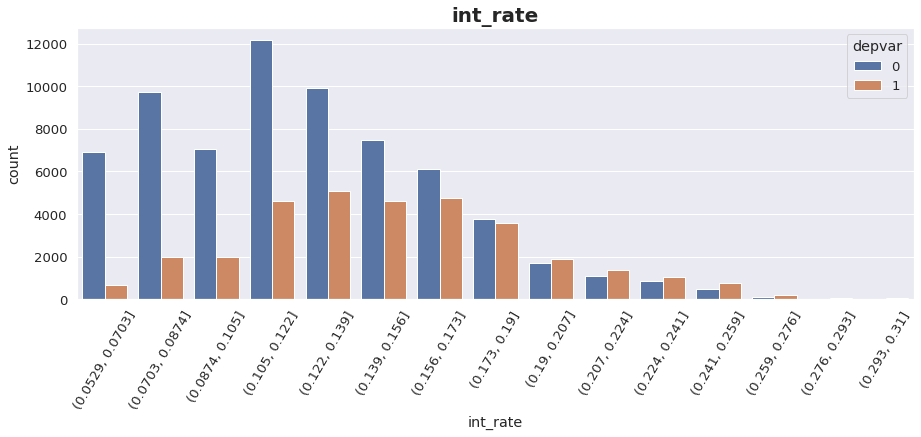

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxint_rate, hue='depvar', data=df).set_title("int_rate",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

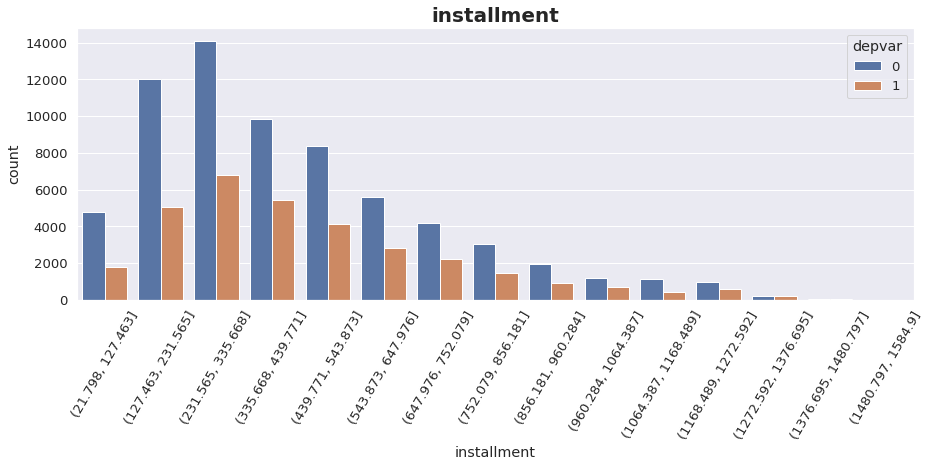

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxinstallment, hue='depvar', data=df).set_title("installment",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

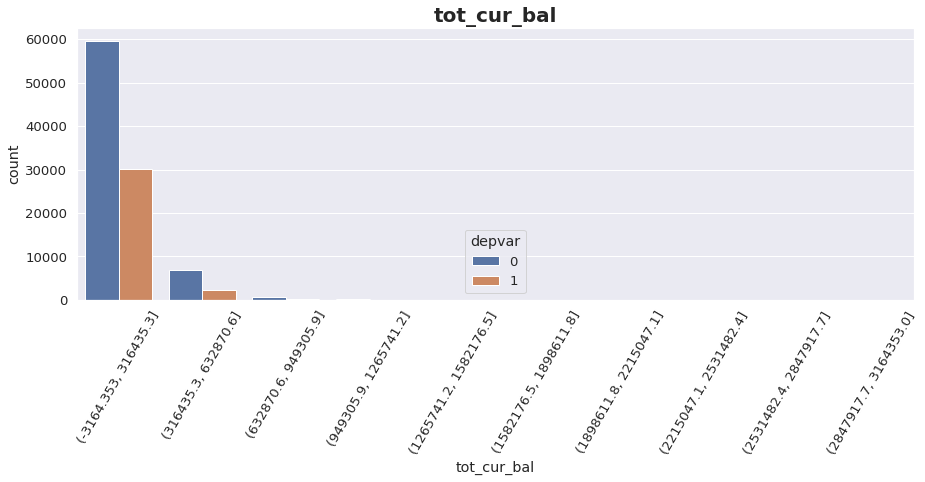

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxtot_cur_bal, hue='depvar', data=df).set_title("tot_cur_bal",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

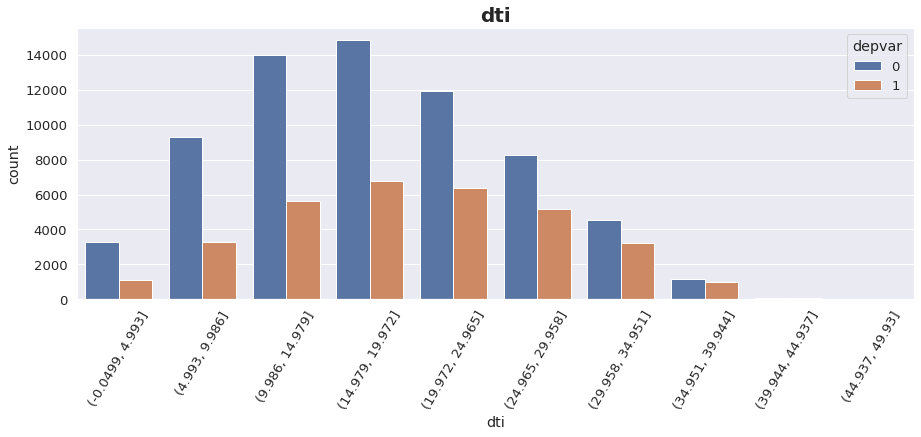

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxdti, hue='depvar', data=df).set_title("dti",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

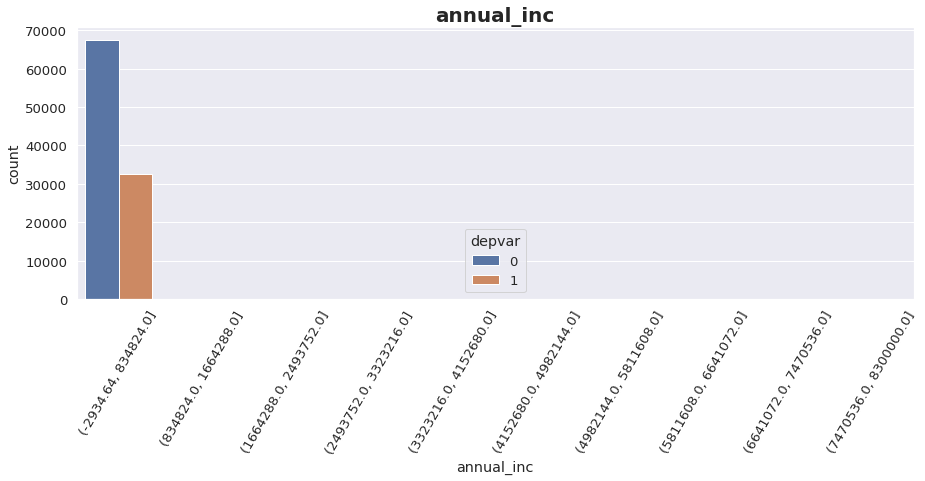

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxannual_inc, hue='depvar', data=df).set_title("annual_inc",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

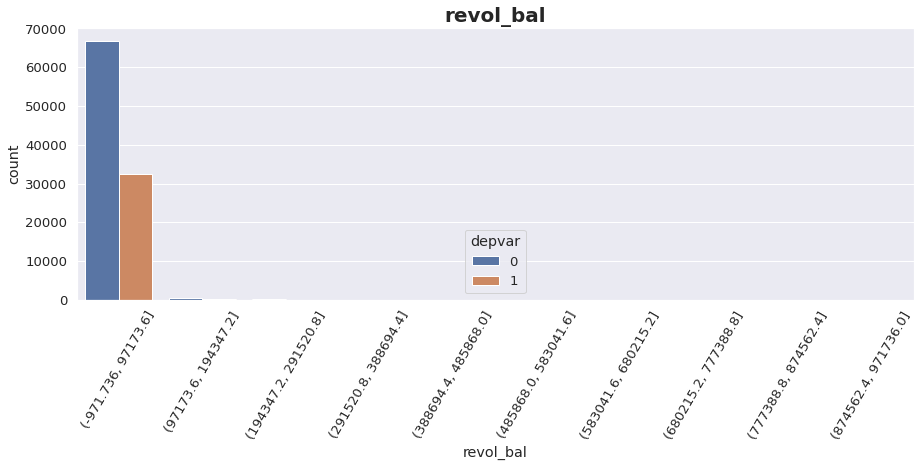

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxrevol_bal, hue='depvar', data=df).set_title("revol_bal",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

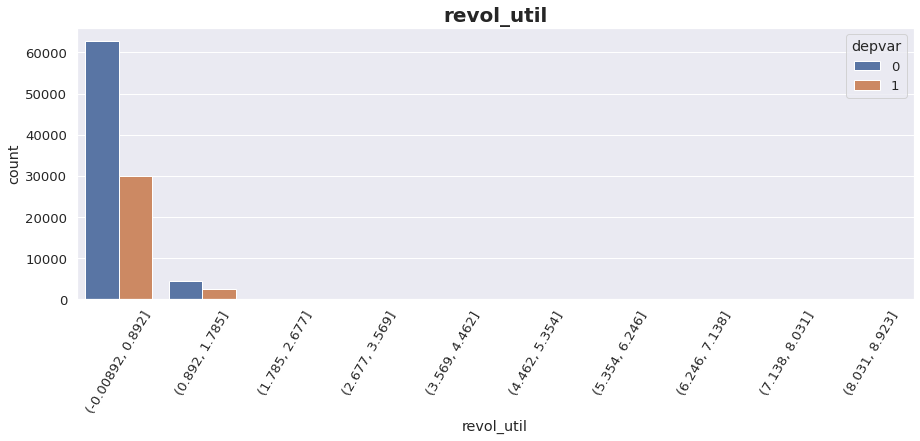

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxrevol_util, hue='depvar', data=df).set_title("revol_util",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

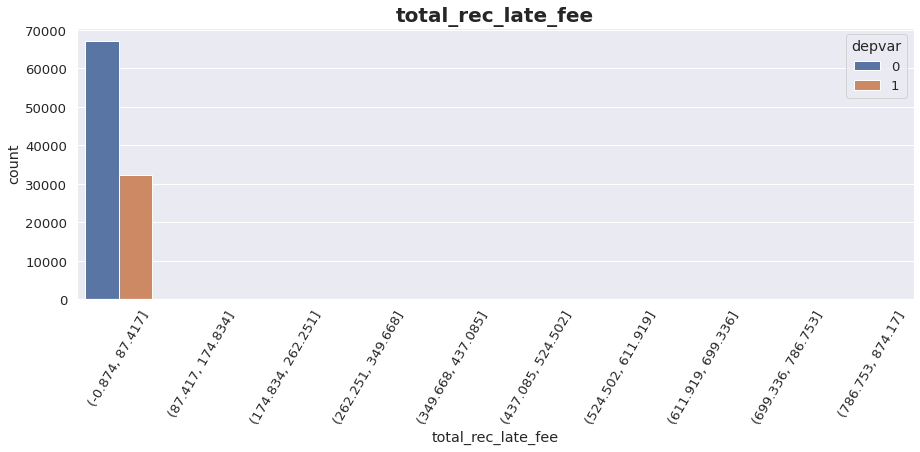

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxtotal_rec_late_fee, hue='depvar', data=df).set_title("total_rec_late_fee",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

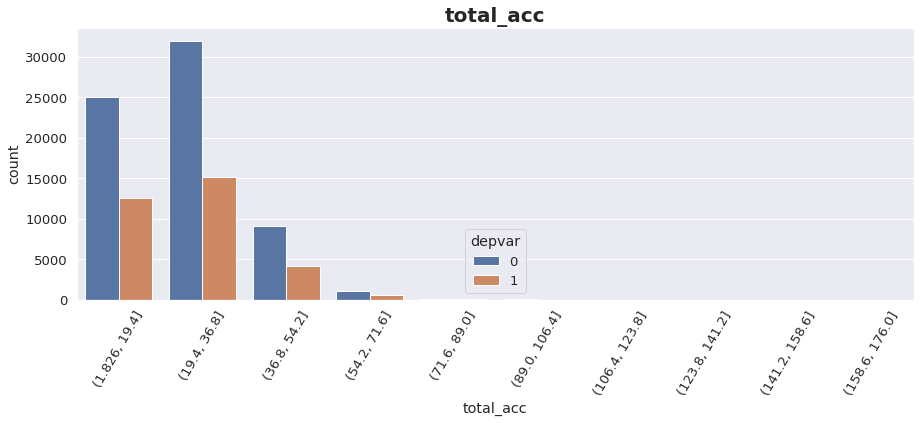

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxtotal_acc, hue='depvar', data=df).set_title("total_acc",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

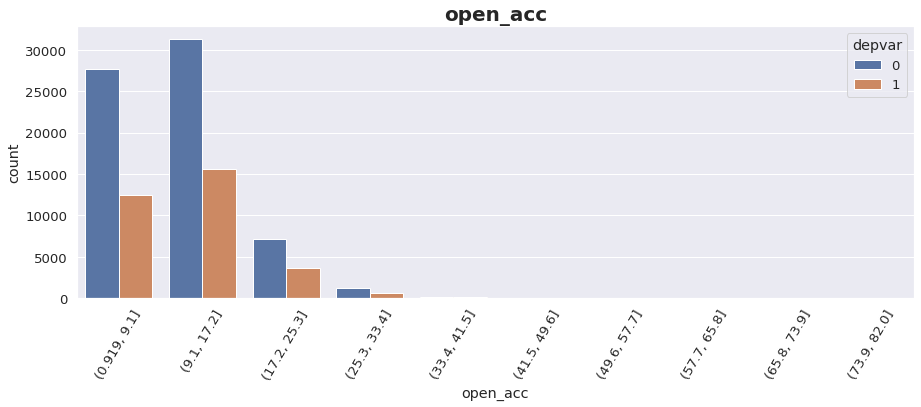

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxopen_acc, hue='depvar', data=df).set_title("open_acc",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

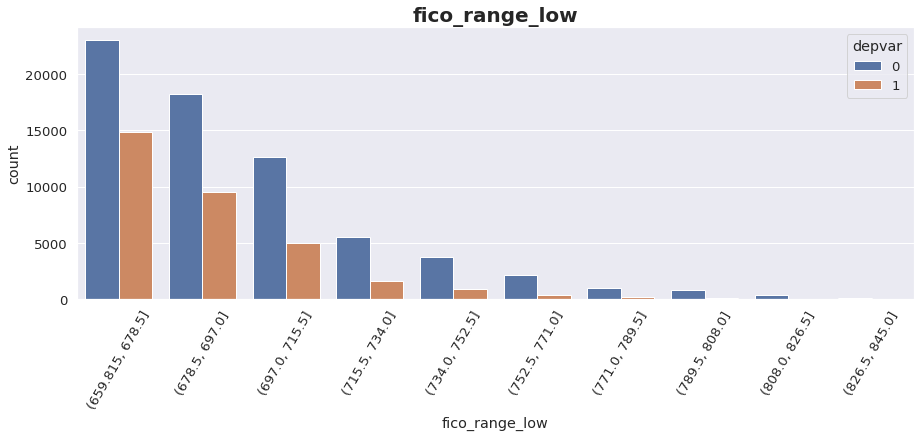

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxfico_range_low, hue='depvar', data=df).set_title("fico_range_low",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

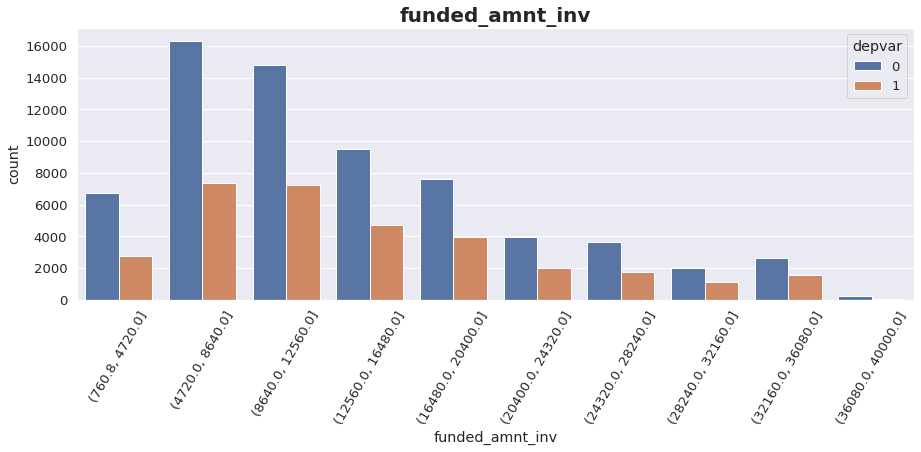

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxfunded_amnt_inv, hue='depvar', data=df).set_title("funded_amnt_inv",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

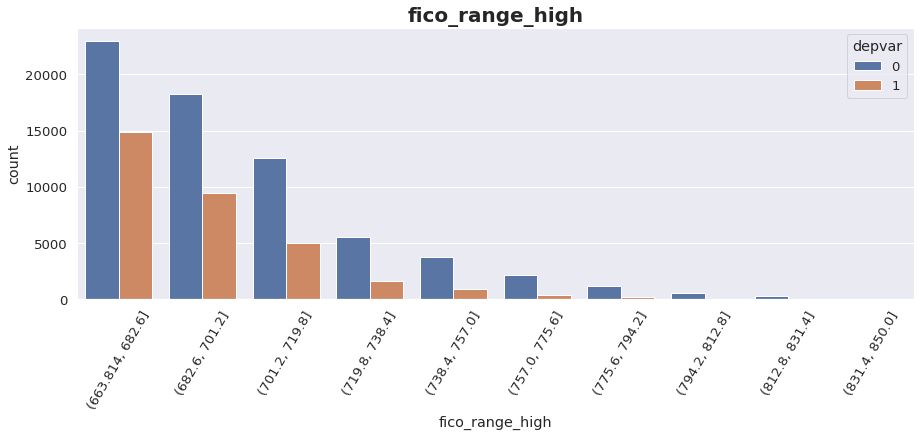

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxfico_range_high, hue='depvar', data=df).set_title("fico_range_high",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

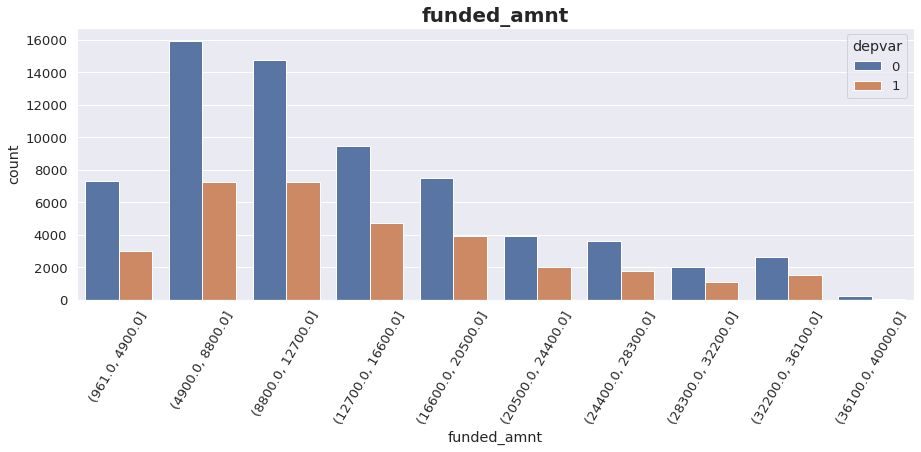

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxfunded_amnt, hue='depvar', data=df).set_title("funded_amnt",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

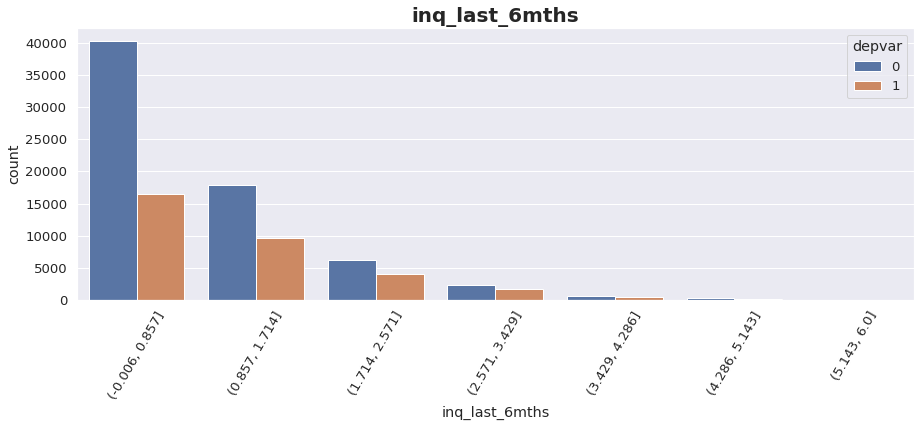

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxinq_last_6mths, hue='depvar', data=df).set_title("inq_last_6mths",fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.xticks(rotation=60)
plt.show()

In [ ]:
df3 = df2.copy()

In [ ]:
# 예시
# df3['total_rec_int'] = LabelEncoder().fit_transform(auxtotal_rec_int) 

In [ ]:
# Test
for i in col_list[:3]:
  name1 = '"'+i+'"'
  name2 = f'aux{i}'
  print(name1, name2)

"total_rec_int" auxtotal_rec_int
"int_rate" auxint_rate
"installment" auxinstallment


In [ ]:
# name이 string타입이라 그냥 넣어주면 됨
for i, name in enumerate(col_list[:-2]):
    df3[name] = LabelEncoder().fit_transform(aux_list[i])
df3

,total_rec_int,int_rate,installment,tot_cur_bal,dti,annual_inc,revol_bal,revol_util,total_rec_late_fee,total_acc,open_acc,fico_range_low,funded_amnt_inv,fico_range_high,funded_amnt,inq_last_6mths,depvar
0,0,1,0,0,5,0,0,0,0,1,2,5,0,5,0,1,0
1,0,4,2,0,0,0,0,0,0,1,0,0,1,0,1,1,0
2,0,4,1,0,4,0,0,0,0,0,0,0,1,0,1,3,0
3,0,4,4,1,3,0,0,0,0,1,1,1,3,1,3,2,1
4,0,4,2,0,5,0,0,0,0,0,0,0,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,6,0,3,0,0,0,0,1,1,0,4,0,4,3,1
99996,0,2,1,0,0,0,0,0,0,0,0,5,1,5,1,0,0
99997,0,4,1,0,6,0,0,0,0,1,2,0,1,0,1,1,0
99998,0,9,1,0,0,0,0,0,0,0,0,2,1,2,1,1,1


In [ ]:
print(pd.crosstab(df3['total_rec_int'],df3['depvar']))

depvar             0      1
total_rec_int              
0              58714  27653
1               6510   3853
2               1572    799
3                446    221
4                147     38
5                 42      5


In [ ]:
# 위에서 시각화했던 값 수치 실제로 확인
for col in col_list[:-1]:
    print(pd.crosstab(df3[col], df3['depvar']))

depvar             0      1
total_rec_int              
0              58714  27653
1               6510   3853
2               1572    799
3                446    221
4                147     38
5                 42      5
depvar        0     1
int_rate             
0          6907   678
1          9711  1998
2          7039  1967
3         12145  4610
4          9922  5063
5          7493  4598
6          6130  4773
7          3788  3563
8          1716  1881
9          1084  1354
10          854  1049
11          480   755
12          121   180
13           28    60
14           13    40
depvar           0     1
installment             
0             4785  1800
1            12020  5047
2            14097  6798
3             9841  5433
4             8356  4131
5             5622  2820
6             4199  2212
7             3047  1439
8             1952   929
9             1175   687
10            1111   441
11             972   581
12             221   202
13              31    41
14

In [ ]:
col_list

['total_rec_int',
 'int_rate',
 'installment',
 'tot_cur_bal',
 'dti',
 'annual_inc',
 'revol_bal',
 'revol_util',
 'total_rec_late_fee',
 'total_acc',
 'open_acc',
 'fico_range_low',
 'funded_amnt_inv',
 'fico_range_high',
 'funded_amnt',
 'inq_last_6mths',
 'depvar']

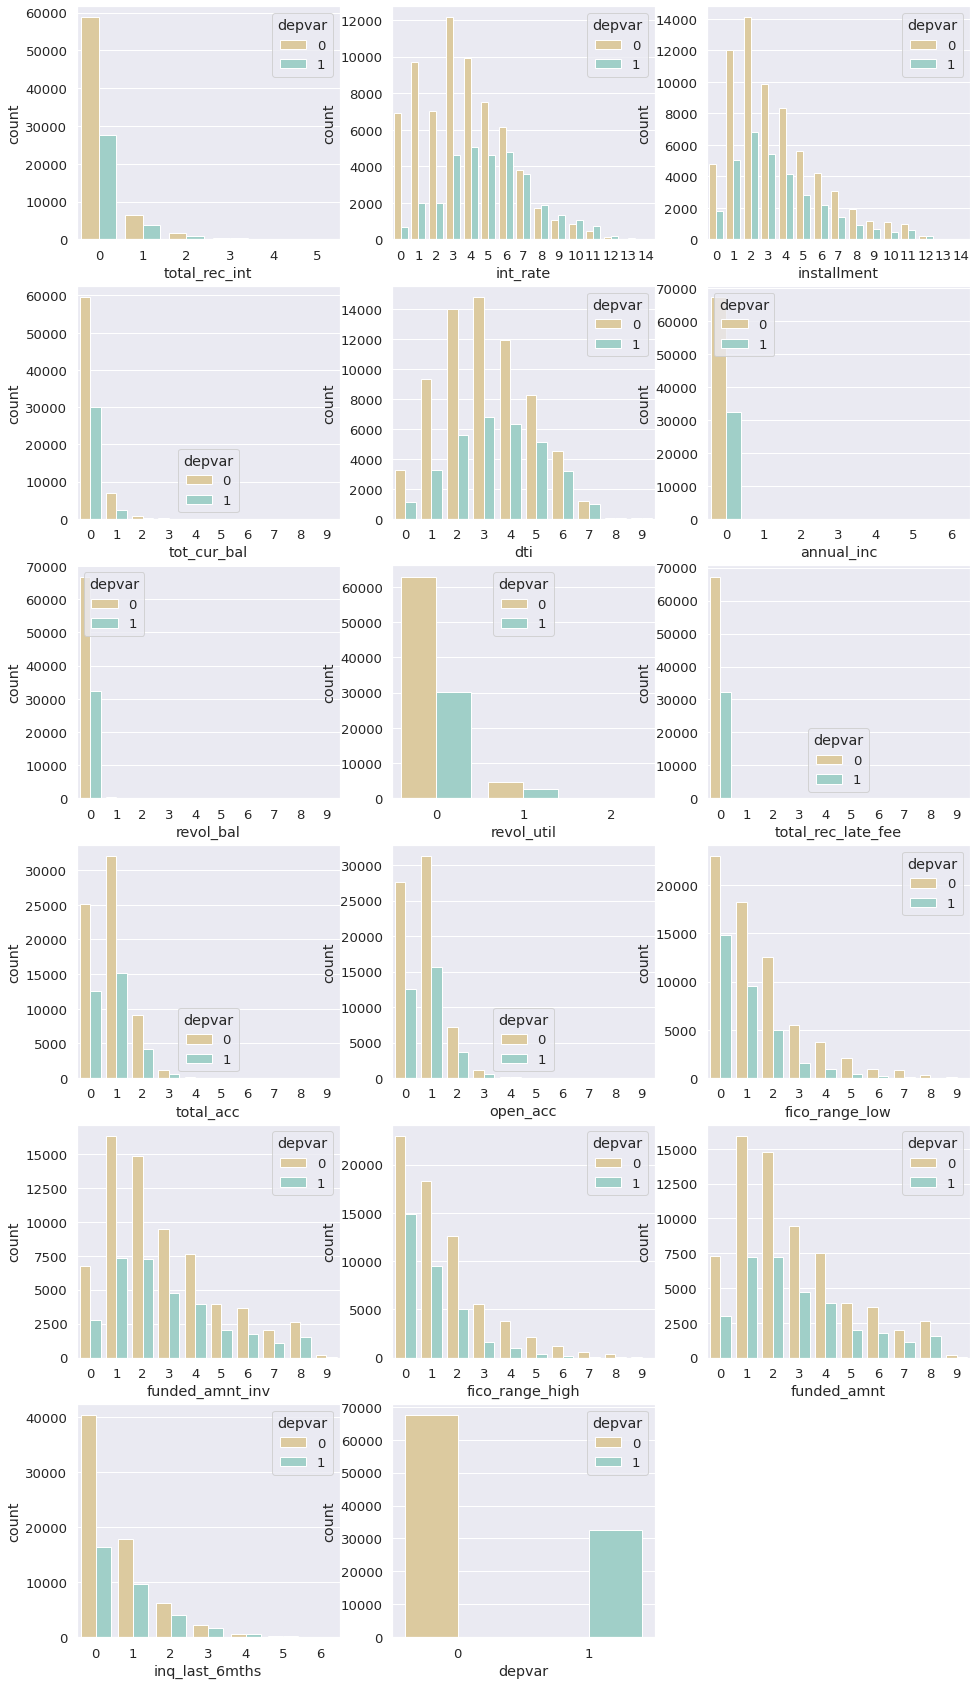

In [ ]:
plt.figure(figsize=(16, 30))
sns.set(font_scale=1.2)
sns.set_style('darkgrid') #'whitegrid', 'ticks', 'white', 'dark'

for i, feature in enumerate(col_list):
    plt.subplot(6, 3, i+1)
    sns.countplot(data=df3, x=feature, hue='depvar', palette='BrBG')

In [ ]:
# 원핫인코딩으로 바꿔줌
df4 = pd.get_dummies(df3, columns=col_list[:-1])
df4.columns

Index(['depvar', 'total_rec_int_0', 'total_rec_int_1', 'total_rec_int_2',
       'total_rec_int_3', 'total_rec_int_4', 'total_rec_int_5', 'int_rate_0',
       'int_rate_1', 'int_rate_2',
       ...
       'funded_amnt_7', 'funded_amnt_8', 'funded_amnt_9', 'inq_last_6mths_0',
       'inq_last_6mths_1', 'inq_last_6mths_2', 'inq_last_6mths_3',
       'inq_last_6mths_4', 'inq_last_6mths_5', 'inq_last_6mths_6'],
      dtype='object', length=154)

In [ ]:
X = df4.drop('depvar', axis=1)
y = df4['depvar']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# Train Valid Split

In [ ]:
X = df.drop('depvar', axis=1)
y = df['depvar']

In [ ]:
# data를 training set과 validation set으로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [ ]:
# training set과 validation set의 데이터 수 확인
print('training set length :', len(X_train))
print('validation set length :', len(X_valid))

training set length : 80000
validation set length : 20000


In [ ]:
# validation set의 라벨 비율 확인
y_valid.sum()/len(y_valid)

0.32525

In [ ]:
# 정규화합니다
X_train_sc = StandardScaler().fit_transform(X_train)
X_test_sc = StandardScaler().fit_transform(X_valid)

tensor([[ 0.2016,  0.0494,  0.4906,  ...,  2.1001, -0.9319, -0.9319],
        [ 0.1993,  0.0100, -1.9555,  ...,  0.0969, -0.5941, -0.5941],
        [ 0.4966, -0.3319,  0.8114,  ..., -0.5851, -0.7630, -0.7630],
        ...,
        [ 0.2016, -0.4840,  0.8684,  ..., -0.7505, -0.9319, -0.9319],
        [-0.1337,  0.9963, -0.7081,  ...,  0.5435, -0.5941, -0.5941],
        [ 0.5592, -0.4503,  1.7558,  ..., -0.5230, -0.9319, -0.9319]])

80000